# Pymaceuticals Inc.
---

### Analysis

- The data below evaluates squamous cell carcinoma (SCC), a form of skin cancer, medication effectiveness against tumors in mice. Over the course of 45 days, tumor development was observed and measured. One thousand mice were examined in this study with nine different medications and one placebo. The main purpose of the study is to compare the drug "Capomulin" against competitors in the marketplace. The study includes almost the same amount of females as males, seperated by less than a 1%. The drugs used in the expereiment include "Capomulin", "Ketapril", "Propriva", "Ceftamin", "Infubinol", "Naftsol", "Ramicane", "Stelasyn", and "Zoniferol". Factors taken in to account for this study include the volume of the tumor, the drug used, the gender of the mice, the age of the mice, and weight of the mice. After careful review of the data the following conclusions are backed by the data:

• Capomulin's efectivenes ranked in the top 3 of the competition
• The more the mice weighed the bigger the tumor
• Tumor volume decreased at a rate for Capomilin only Ramicane could compare to
• Gender did not play a role in effectiveness

Overall, Capomulin produces results that fair well against the competition. Capomulin will be one of the most effective drugs in the SCC arena. 
 

In [427]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
Mouse_metadata_path = "Mouse_metadata.csv"
Study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(Mouse_metadata_path)
study_results = pd.read_csv(Study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [428]:
# Checking the number of mice.
total_mice = mouse_study["Mouse ID"].nunique()
print(f'Total Number of Mice', total_mice)


Total Number of Mice 249


In [429]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mice

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [430]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [431]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = mouse_study[mouse_study['Mouse ID'].isin(duplicate_mice)==False]

clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [432]:
# Checking the number of mice in the clean DataFrame.
number_nonduplicate_mice = clean_study_data["Mouse ID"].nunique()
print(f'Nonduplicate Mice =', number_nonduplicate_mice)

Nonduplicate Mice = 248


## Summary Statistics

In [435]:
# *****Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats_table = clean_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean",
    Median_Tumor_Volume="median",
    Tumor_Volume_Variance="var",
    Tumor_Volume_Standard_Deviation="std",
    Tumor_Volume_Standard_Error="sem"
)
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame(summary_stats_table)

summary_stats_df

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Standard_Deviation,Tumor_Volume_Standard_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [436]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ("Mean", "mean"),
    ("Median", "median"),
    ("Variance", "var"),
    ("Standard Deviation", "std"),
    ("SEM", "sem")
])

adv_summary_stats= pd.DataFrame(summary_stats)
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

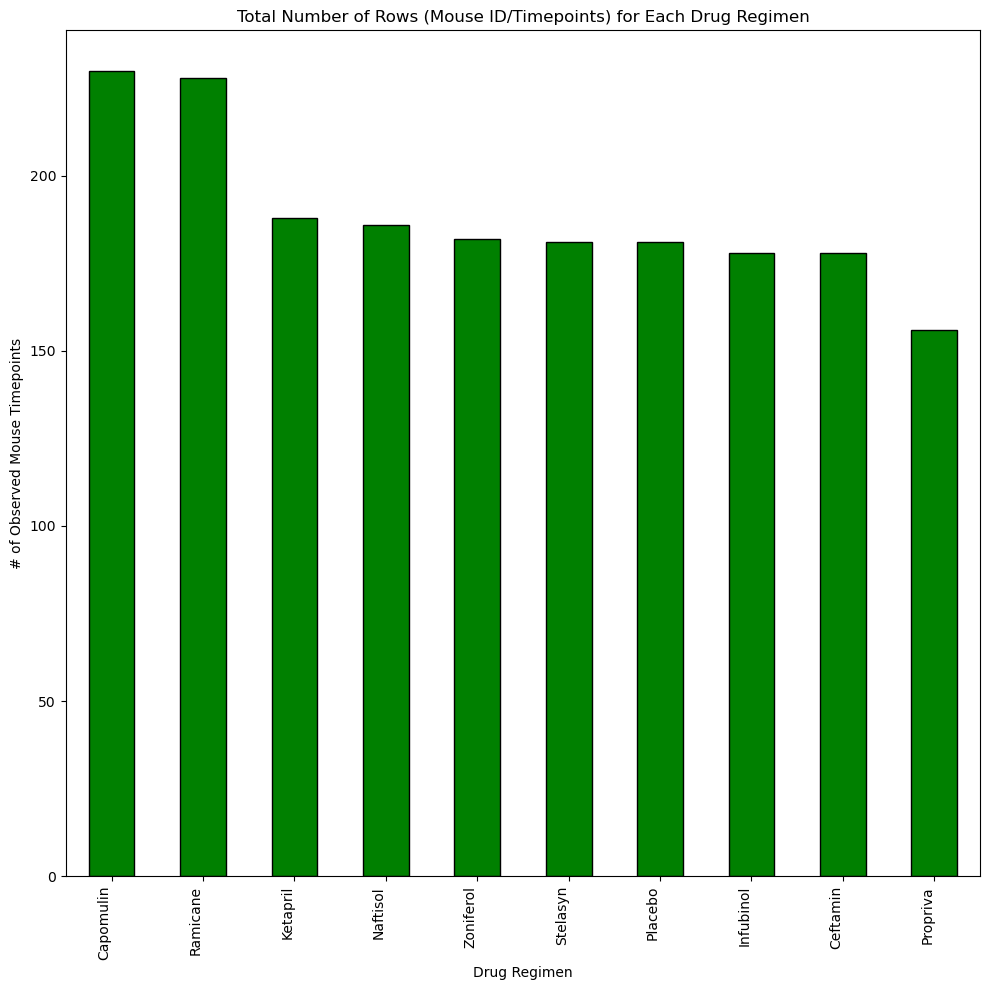

In [437]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 10))
drug_regimen_counts.plot(kind="bar", color="green", edgecolor="black")
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()

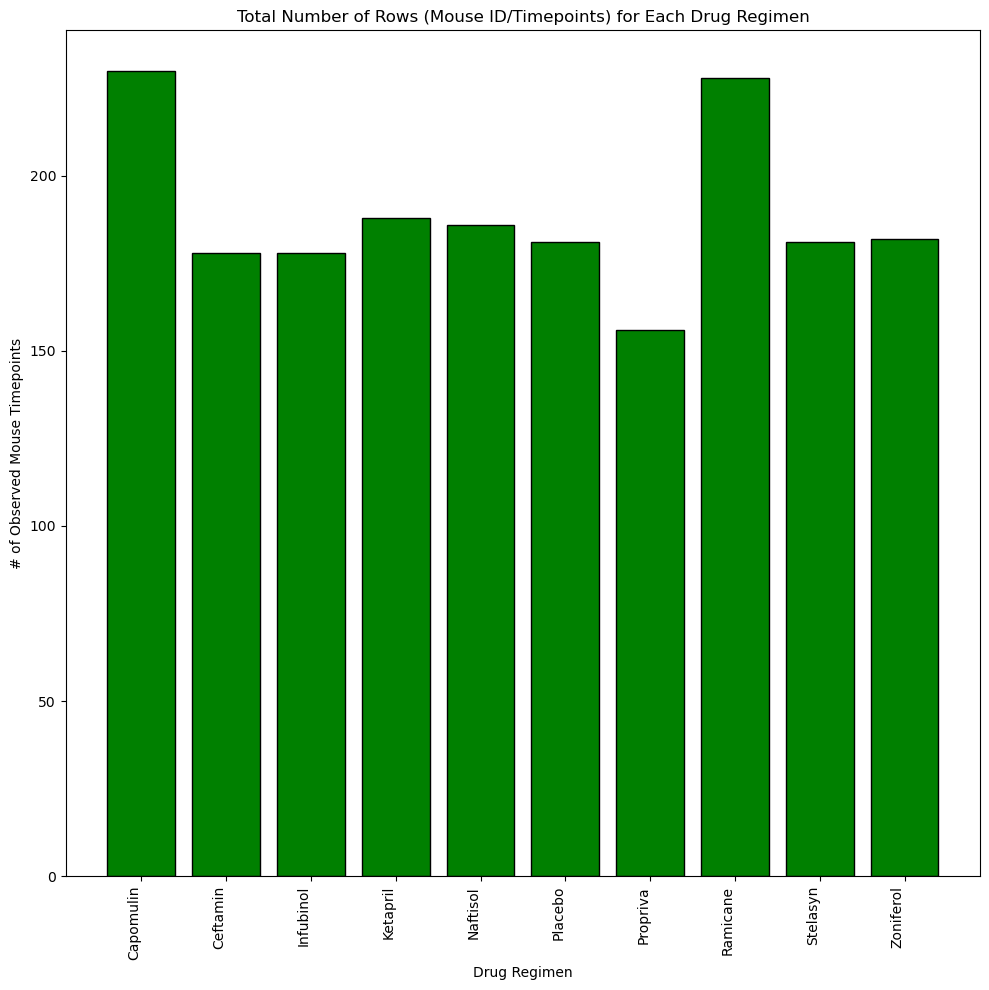

In [438]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data.groupby("Drug Regimen").size()

plt.figure(figsize=(10, 10))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="green", edgecolor="black")
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()

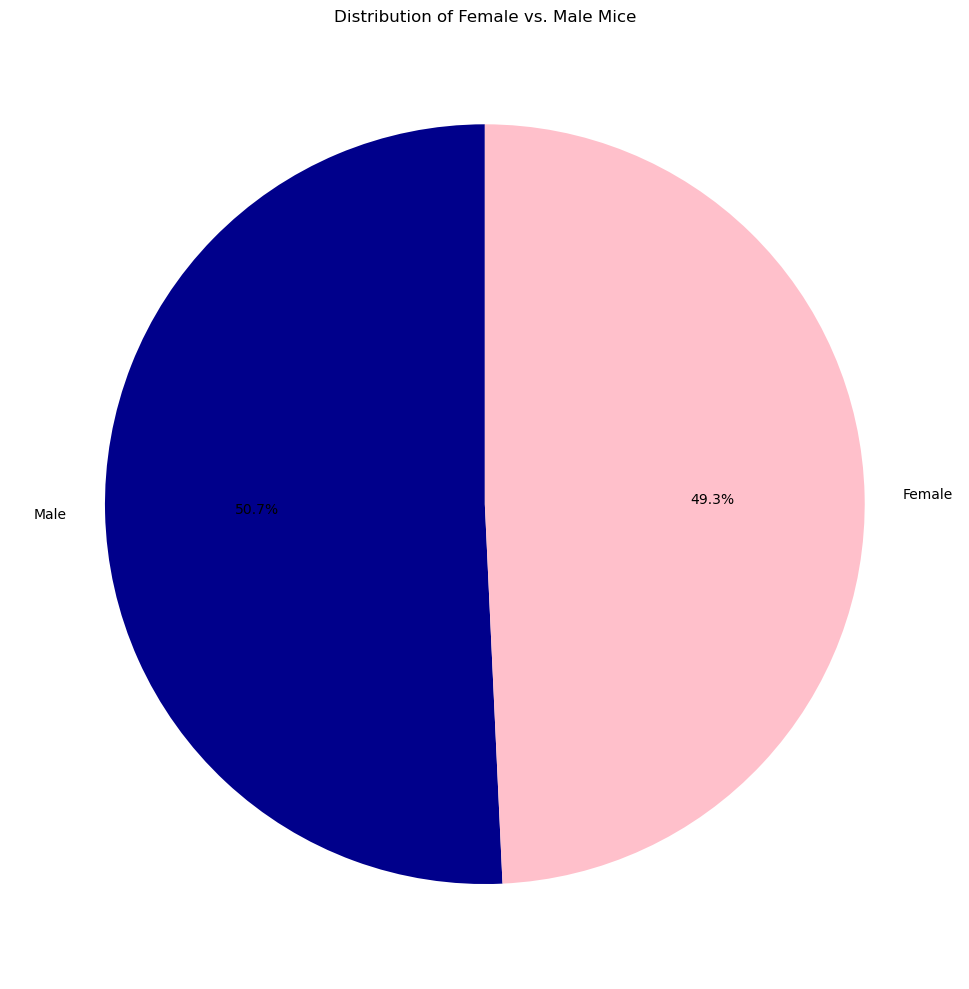

In [439]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distr = clean_data["Sex"].value_counts()

plt.figure(figsize=(10, 10))
gender_distr.plot(kind="pie", autopct="%1.1f%%", colors=["darkblue", "pink"], startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("")  

plt.tight_layout()
plt.show()

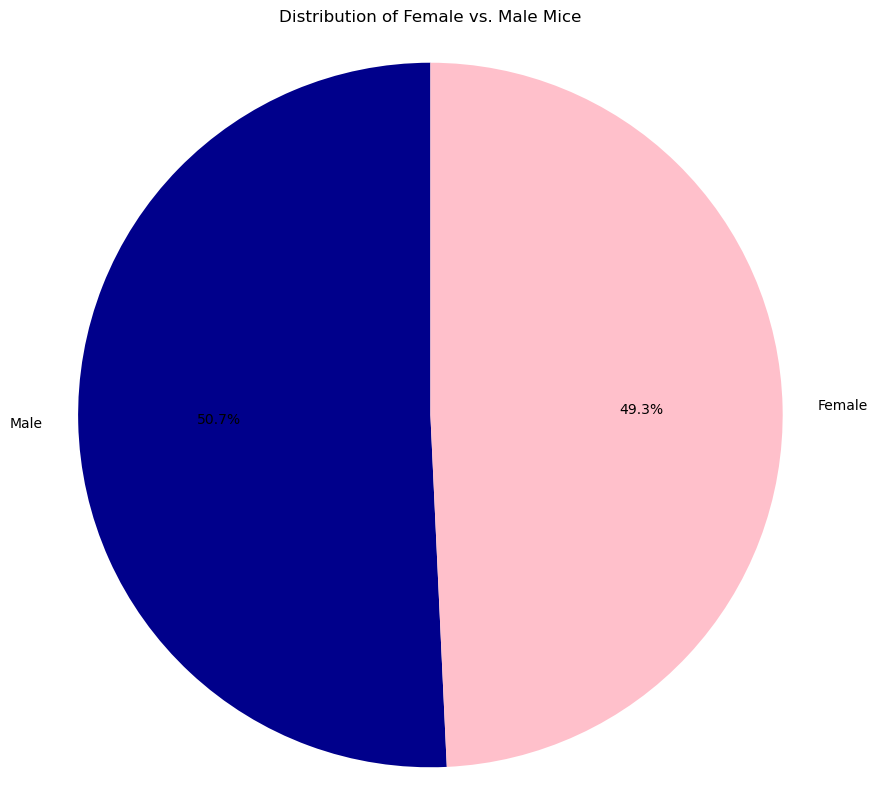

In [440]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_distribution = clean_data["Sex"].value_counts()


plt.figure(figsize=(10, 10))
plt.pie(gender_distribution, labels=gender_distribution.index, colors=["darkblue", "pink"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal") 

plt.show()

## Quartiles, Outliers and Boxplots

In [441]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = clean_data.query("`Drug Regimen` in @treatment_regimens")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_merge = pd.merge(clean_data, final_tumor_volume[["Mouse ID", "Timepoint"]], on=["Mouse ID", "Timepoint"])


In [442]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_data.loc[clean_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Results
    print(f"Drug Regimen: {drug}")
    print(f"Lower Quartile: {quartiles[0.25]}")
    print(f"Upper Quartile: {quartiles[0.75]}")
    print(f"IQR: {quartiles[0.75] - quartiles[0.25]}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.values}\n")


Drug Regimen: Capomulin
Lower Quartile: 37.685932865
Upper Quartile: 45.0
IQR: 7.314067135000002
Lower Bound: 26.714832162499995
Upper Bound: 55.9711007025
Potential Outliers: [25.47214326 23.34359787]

Drug Regimen: Ramicane
Lower Quartile: 36.674634585
Upper Quartile: 45.0
IQR: 8.325365415
Lower Bound: 24.1865864625
Upper Bound: 57.488048122500004
Potential Outliers: [22.05012627]

Drug Regimen: Infubinol
Lower Quartile: 47.3123533
Upper Quartile: 57.314443967500004
IQR: 10.002090667500006
Lower Bound: 32.309217298749985
Upper Bound: 72.31757996875001
Potential Outliers: []

Drug Regimen: Ceftamin
Lower Quartile: 47.2084271125
Upper Quartile: 56.801437570000004
IQR: 9.593010457500007
Lower Bound: 32.81891142624998
Upper Bound: 71.19095325625001
Potential Outliers: []



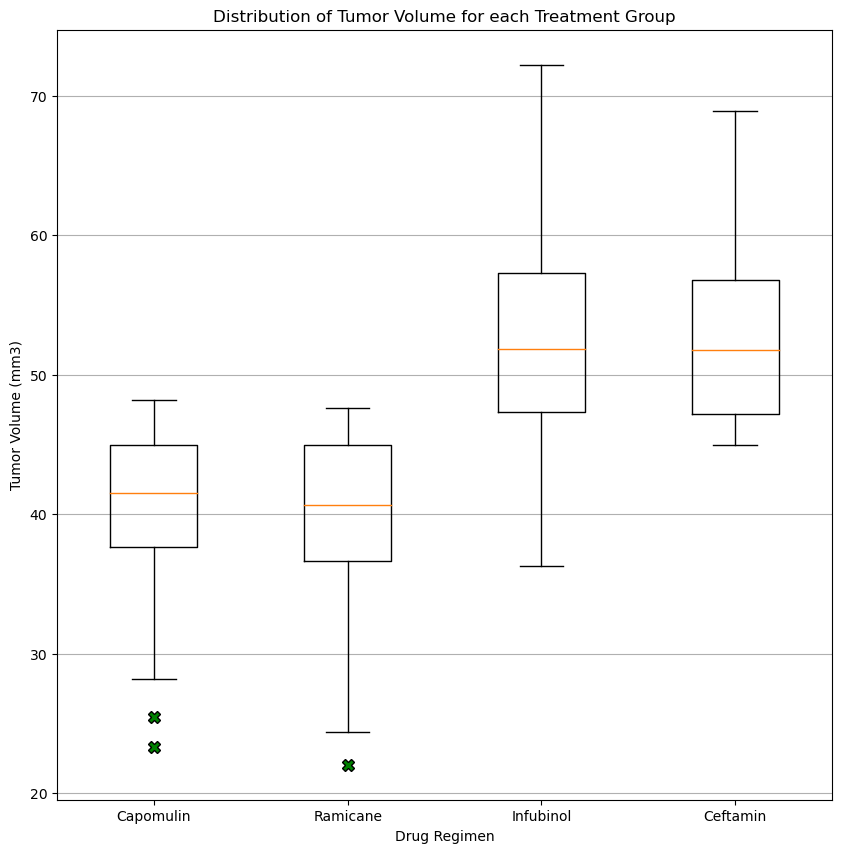

In [443]:
#Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 10))
plt.boxplot(tumor_volume_data, labels=treatment_regimens, flierprops=dict(marker='X', markerfacecolor='green', markersize=8))
plt.title("Distribution of Tumor Volume for each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")
plt.show()

## Line and Scatter Plots

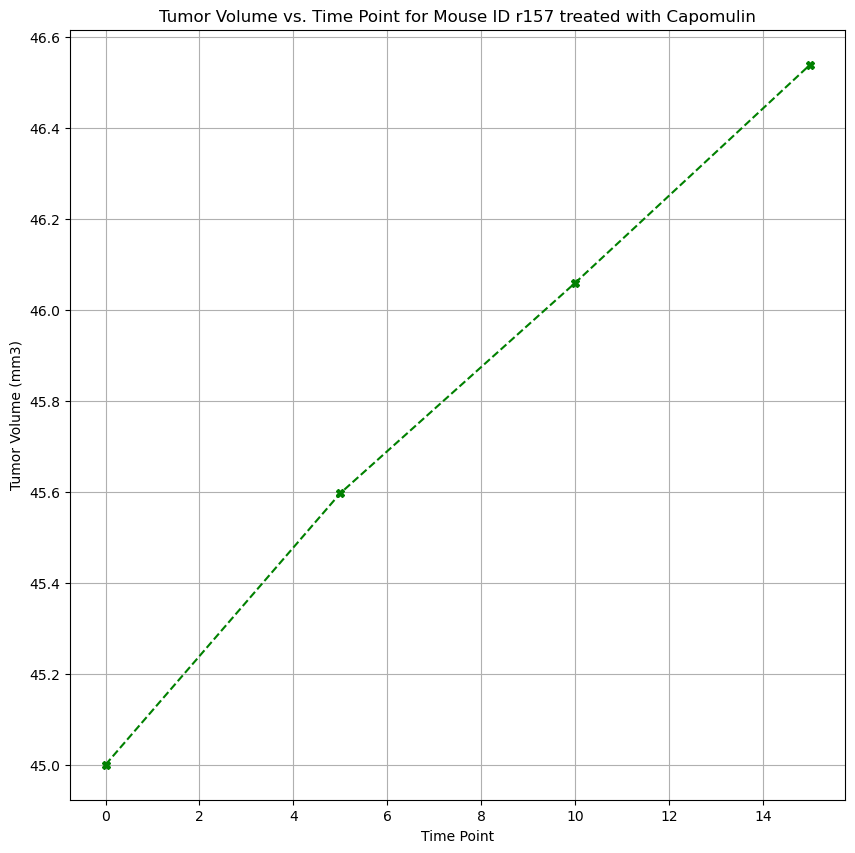

In [444]:
# ****Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

selected_mouse = "r157" 

single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == selected_mouse]


plt.figure(figsize=(10, 10))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='X', linestyle='--', color='g')
plt.title(f"Tumor Volume vs. Time Point for Mouse ID {selected_mouse} treated with Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

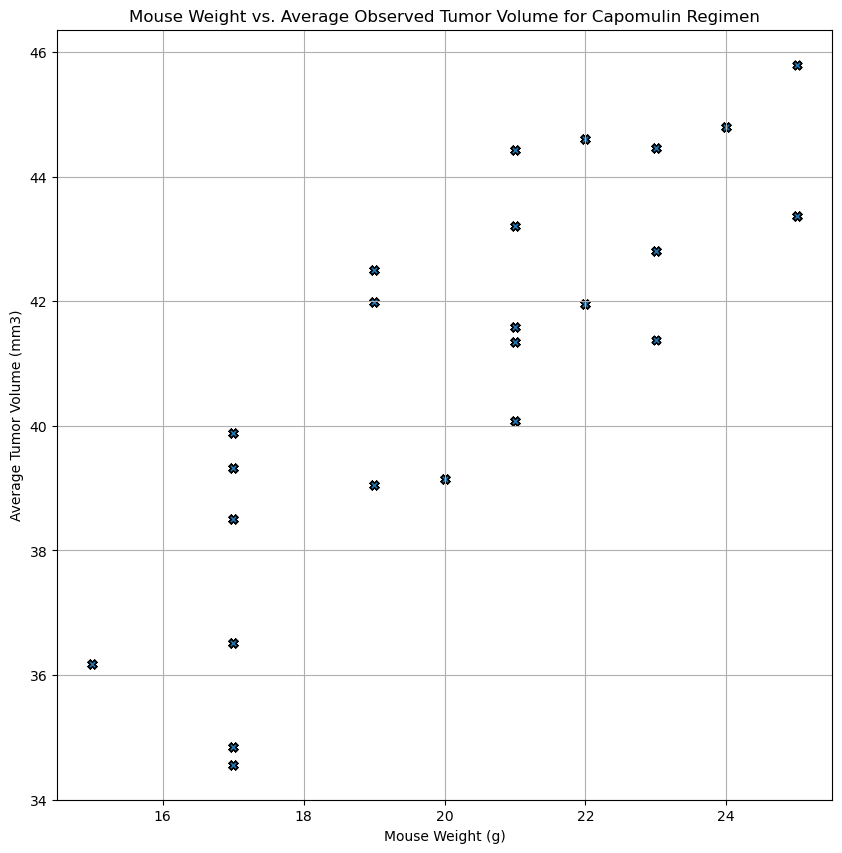

In [445]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume_df = pd.DataFrame({"Mouse ID": average_tumor_volume.index, "Average Tumor Volume (mm3)": average_tumor_volume.values})
capomulin_with_avg_volume = pd.merge(capomulin_data, average_tumor_volume_df, on="Mouse ID")



plt.figure(figsize=(10, 10))
plt.scatter(capomulin_with_avg_volume["Weight (g)"], capomulin_with_avg_volume["Average Tumor Volume (mm3)"], marker='X', edgecolors='black')
plt.title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Correlation and Regression

The Correlation Coefficient is 0.83


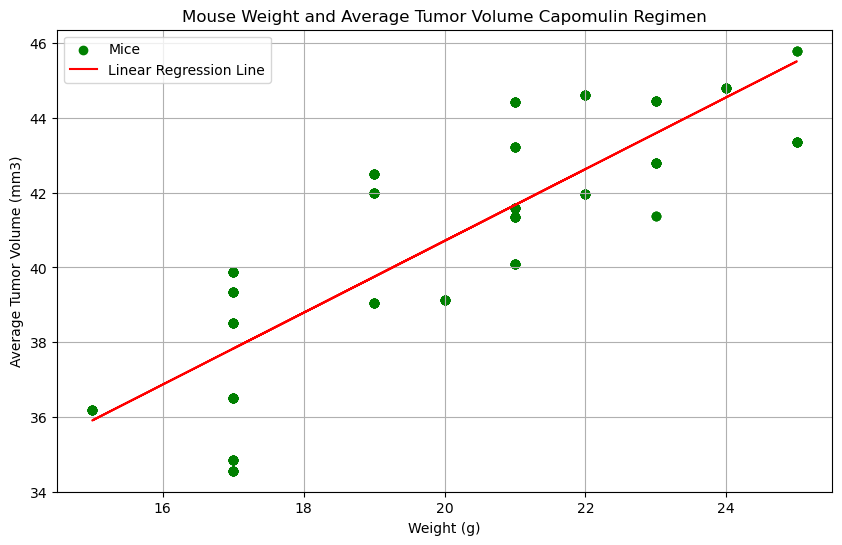

In [446]:
# Calculate the correlation coefficient and a linear regression model 

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, _ = st.pearsonr(capomulin_with_avg_volume["Weight (g)"], capomulin_with_avg_volume["Average Tumor Volume (mm3)"])

print(f"The Correlation Coefficient is {correlation_coefficient:.2f}")


# Scatter plot of mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_with_avg_volume["Weight (g)"], capomulin_with_avg_volume["Average Tumor Volume (mm3)"], color='g', label='Mice')

# Linear regression line
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_with_avg_volume["Weight (g)"], capomulin_with_avg_volume["Average Tumor Volume (mm3)"])
regression_line = slope * capomulin_with_avg_volume["Weight (g)"] + intercept
plt.plot(capomulin_with_avg_volume["Weight (g)"], regression_line, color='r', label='Linear Regression Line')

# Add labels and legend
plt.title("Mouse Weight and Average Tumor Volume Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
